**STEPS INVOLVED IN MODEL BUILDING**

1. Import all libraries
2. Import dataset(read_csv,head(),shape,info(),describe())
3. Identify independent and dependent variables(X,Y)
4. Data-preporcessing (Encoders,Scaling)
5. Splitting the dataset into training set and testing set.(0.20)
6. Apply the modeling algorithms
7. Prediction for the testing
8. Visualising the training and testing dataset
9. Metrics
10. Summary for Model



In [ ]:
#import libraries
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Import datasets
df=pd.read_csv("/content/Data.csv")

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
df.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.shape

(10, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
df.describe()  #only for numerical values

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
#to check if we have null values
df.isnull().sum()   #gives the no. of null values

#if drastic changes in null then drop that column
#if not then we replace

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
#splitting Data into Independent and Dependent variables
X=df.iloc[:,:-1].values  #includes all columns except last
Y=df.iloc[:,-1].values  #want only the last column

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
#mean imputation  we use scikit for pre processing and modelling    #fit and fit transformation HW
from sklearn.impute import SimpleImputer

#assign the function for missing value with replacement
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')  #mean imputation

#Fitting the imputer object
imputer.fit(X[:,1:3])   #age , salary index 1 and 2

#Replacing the missing value
X[:,1:3]=imputer.transform(X[:,1:3])

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
#convert categorical into numerical (country column)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label=LabelEncoder()
X[:,0]= label.fit_transform(X[:,0]) #country's index number

In [ ]:
X #uses ASCII value alphabetical order

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [ ]:
#Train & Test
#Model building
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)  #TEST SIZE IS 0.2 I,E 20% , given random train to test

In [ ]:
X_train  #any random 8 from the 10 that is given

array([[1, 40.0, 63777.77777777778],
       [0, 37.0, 67000.0],
       [2, 27.0, 48000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [2, 38.0, 61000.0],
       [0, 44.0, 72000.0],
       [0, 35.0, 58000.0]], dtype=object)

In [ ]:
Y_train

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'], dtype=object)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train  #distributed in between 0s and 1s

array([[ 0.13483997,  0.26306757,  0.12381479],
       [-0.94387981, -0.25350148,  0.46175632],
       [ 1.21355975, -1.97539832, -1.53093341],
       [ 1.21355975,  0.05261351, -1.11141978],
       [-0.94387981,  1.64058505,  1.7202972 ],
       [ 1.21355975, -0.0813118 , -0.16751412],
       [-0.94387981,  0.95182631,  0.98614835],
       [-0.94387981, -0.59788085, -0.48214934]])

In [ ]:
#to create model building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.predict(sc.transform([[2,34,52000]]))   #test point , and yes he can purchase

array(['Yes'], dtype=object)

In [ ]:
#visualisation
import seaborn as sns

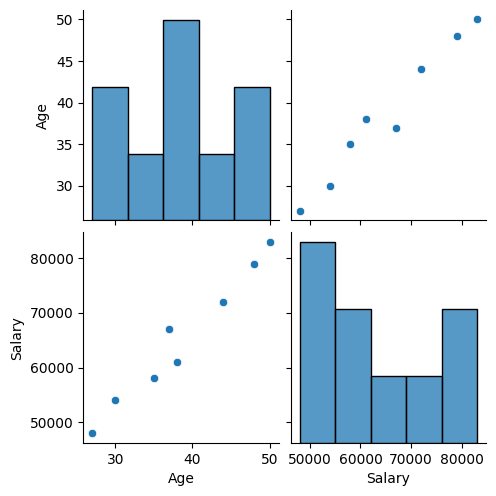

In [ ]:
sns.pairplot(df)

<ipython-input-20-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

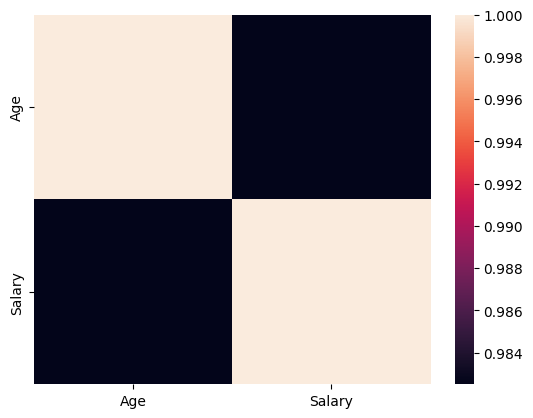

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Salary
Age,1.000000,0.982495
Salary,0.982495,1.000000


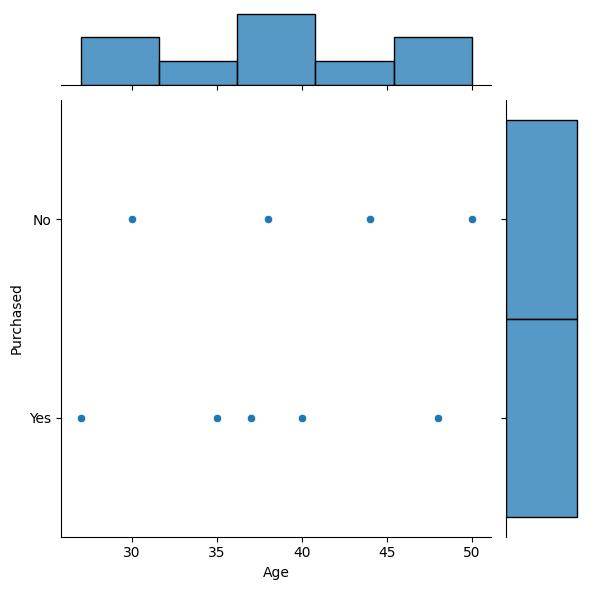

In [ ]:
sns.jointplot(x='Age', y='Purchased',data=df)

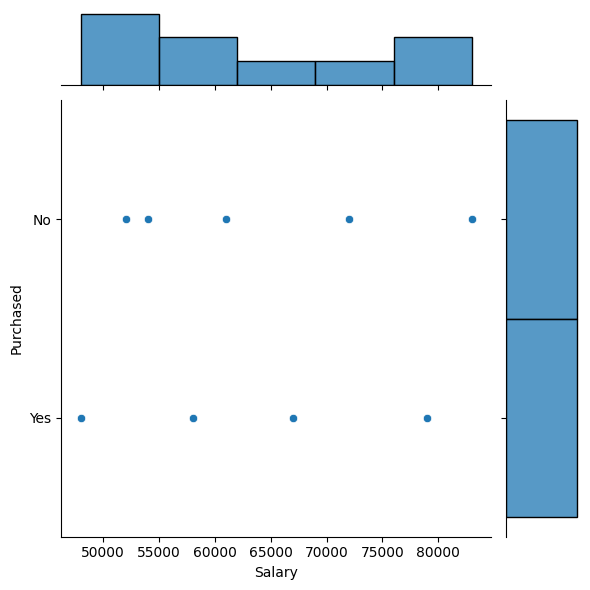

In [ ]:
sns.jointplot(x='Salary',y='Purchased',data=df)